In [1]:
#ADF検定により、1,4,7,8,9,10,12月には単位根がないことが判明する。
#単位根がある月については差分系列への回帰を行うことで1年の予測をする。

In [2]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 11832656121797759444
 xla_global_id: -1]

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import itertools
import warnings
warnings.filterwarnings("ignore")


from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.optimizers import Adam

import seaborn as sns
import random
import csv

from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler



In [4]:
import numpy as np
import pandas as pd
import pmdarima as pm
from pmdarima import utils
from pmdarima import arima
from pmdarima import model_selection
from tensorflow.keras.layers import LSTM

import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

from matplotlib import pyplot as plt

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, ReLU, PReLU
from keras_tuner.tuners import RandomSearch
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_percentage_error

Using TensorFlow backend


In [6]:
df=pd.read_csv('icecream_sales_date 2009-2022.csv', index_col='date', parse_dates=True,encoding="utf-8")
df.head()

,sales,tokyo_temperature,holiday,Unnamed: 4,temperature_difference_2009_2018,temperature_difference_2019_2021,Unnamed: 7,2009,2010,2011,...,2015,2016,2017,2018,2019,2020,2021,2022,AVERAGE2009-2018,AVERAGE2019-2021
date,,,,,,,,,,,,,,,,,,,,,
2009-01-01,17.59,10.6,1,NaN,0.521429,0.033333,1.0,10.2,11.0,9.1,...,10.4,10.6,10.8,9.4,10.3,11.1,10.3,9.4,10.078571,10.566667
2009-01-02,23.83,11.6,1,NaN,1.521429,1.033333,2.0,11.5,9.9,11.2,...,10.4,12.2,12.1,10.1,11.6,13.3,14.0,10.5,11.142857,12.966667
2009-01-03,22.94,10.7,1,NaN,0.621429,0.133333,3.0,13.7,13.2,12.3,...,15.5,14.9,13.4,16.9,15.4,16.0,17.9,16.6,14.942857,16.433333
2009-01-04,17.14,11.1,1,NaN,1.021429,0.533333,4.0,20.2,16.6,18.9,...,19.3,20.3,19.9,22.1,19.0,18.2,20.6,20.2,19.471429,19.266667
2009-01-05,10.32,11.8,0,NaN,1.721429,1.233333,5.0,23.6,23.0,22.2,...,26.4,25.2,25.1,24.6,25.3,24.0,24.1,23.5,24.242857,24.466667


In [7]:
df_train=df[:"2018-12-31"]
df_test=df["2019-01-01":"2019-12-31"]

In [8]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

In [9]:
year=10
sales=df["sales"]
sales

date
2009-01-01    17.59
2009-01-02    23.83
2009-01-03    22.94
2009-01-04    17.14
2009-01-05    10.32
              ...  
2022-12-27    21.51
2022-12-28    21.46
2022-12-29    27.37
2022-12-30    30.94
2022-12-31    41.60
Name: sales, Length: 5110, dtype: float64

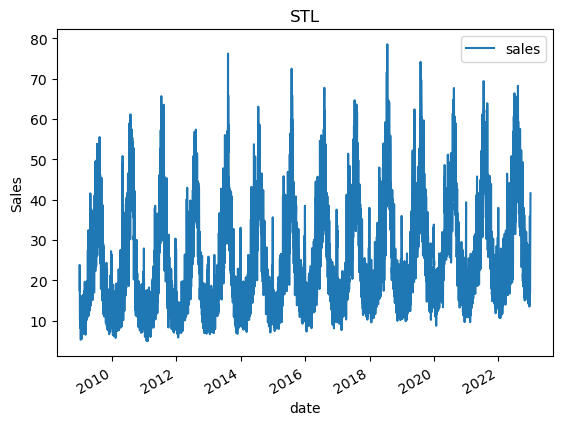

In [10]:
sales.plot()                                 #残差（resid）のグラフ描写
plt.title('STL')                            #グラフタイトル
plt.ylabel('Sales') #タテ軸のラベル
plt.xlabel('date')                                #ヨコ軸のラベル
plt.legend()                                       #凡例表示
plt.show()

In [11]:
import statsmodels.api

In [12]:
from statsmodels.formula.api import ols
from statsmodels.formula.api import gls
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import statsmodels.api as sm

In [13]:
import statsmodels.formula.api as smf
from scipy.linalg import toeplitz
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.stattools import durbin_watson
from statsmodels.tsa.seasonal import STL, seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.deterministic import Fourier, DeterministicProcess
from statsmodels.graphics.tsaplots import plot_acf

In [14]:
import statsmodels.formula.api as smf
from scipy.linalg import toeplitz
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.stattools import durbin_watson
from statsmodels.tsa.seasonal import STL, seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.deterministic import Fourier, DeterministicProcess
from statsmodels.graphics.tsaplots import plot_acf

In [15]:
df_temperature=df_train["temperature_difference_2009_2018"]
df_temperature

date
2009-01-01    0.521429
2009-01-02    1.521429
2009-01-03    0.621429
2009-01-04    1.021429
2009-01-05    1.721429
                ...   
2018-12-27    1.100000
2018-12-28   -3.700000
2018-12-29   -2.300000
2018-12-30   -2.000000
2018-12-31   -3.200000
Name: temperature_difference_2009_2018, Length: 3650, dtype: float64

In [16]:
df_holiday=df_train["holiday"]

In [17]:
holiday_np = np.array(df_holiday, dtype=float)

In [18]:
temperature_np = np.array(df_temperature, dtype=float)
temperature_np

array([ 0.52142857,  1.52142857,  0.62142857, ..., -2.3       ,
       -2.        , -3.2       ])

In [19]:
import numpy as np
import plotly.graph_objects as go

In [20]:
# s_temperature：一つ目の説明変数
x1=temperature_np
x1.shape

(3650,)

In [21]:
#holiday_np:二つ目の説明変数
x2=holiday_np
x2

array([1., 1., 1., ..., 1., 1., 1.])

In [22]:
# stl_r:目的変数
y=sales[:365*year]
y.shape

(3650,)

In [23]:
janday=31
febday=janday+28
marday=febday+31
aprday=marday+30
mayday=aprday+31
junday=mayday+30
julday=junday+31
augday=julday+31
sepday=augday+30
octday=sepday+31
novday=octday+30
decday=novday+31

In [24]:
janx1=[]
janx2=[]
jany=[]
i=0
for i in range(year):
    janx1=np.append(janx1,x1[i*365:i*365+janday])
    janx2=np.append(janx2,x2[i*365:i*365+janday])
    jany=np.append(jany,y[i*365:i*365+janday])
    
febx1=[]
febx2=[]
feby=[]
i=0
for i in range(year):
    febx1=np.append(febx1,x1[i*365+janday:i*365+febday])
    febx2=np.append(febx2,x2[i*365+janday:i*365+febday])
    feby=np.append(feby,y[i*365+janday:i*365+febday])
    
marx1=[]
marx2=[]
mary=[]
i=0
for i in range(year):
    marx1=np.append(marx1,x1[i*365+febday:i*365+marday])
    marx2=np.append(marx2,x2[i*365+febday:i*365+marday])
    mary=np.append(mary,y[i*365+febday:i*365+marday])
    
aprx1=[]
aprx2=[]
apry=[]
i=0
for i in range(year):
    aprx1=np.append(aprx1,x1[i*365+marday:i*365+aprday])
    aprx2=np.append(aprx2,x2[i*365+marday:i*365+aprday])
    apry=np.append(apry,y[i*365+marday:i*365+aprday])

mayx1=[]
mayx2=[]
mayy=[]
i=0
for i in range(year):
    mayx1=np.append(mayx1,x1[i*365+aprday:i*365+mayday])
    mayx2=np.append(mayx2,x2[i*365+aprday:i*365+mayday])
    mayy=np.append(mayy,y[i*365+aprday:i*365+mayday])
    
junx1=[]
junx2=[]
juny=[]
i=0
for i in range(year):
    junx1=np.append(junx1,x1[i*365+mayday:i*365+junday])
    junx2=np.append(junx2,x2[i*365+mayday:i*365+junday])
    juny=np.append(juny,y[i*365+mayday:i*365+junday])
    
julx1=[]
julx2=[]
july=[]
i=0
for i in range(year):
    julx1=np.append(julx1,x1[i*365+junday:i*365+julday])
    julx2=np.append(julx2,x2[i*365+junday:i*365+julday])
    july=np.append(july,y[i*365+junday:i*365+julday])
    
augx1=[]
augx2=[]
augy=[]
i=0
for i in range(year):
    augx1=np.append(augx1,x1[i*365+julday:i*365+augday])
    augx2=np.append(augx2,x2[i*365+julday:i*365+augday])
    augy=np.append(augy,y[i*365+julday:i*365+augday])
    
sepx1=[]
sepx2=[]
sepy=[]
i=0
for i in range(year):
    sepx1=np.append(sepx1,x1[i*365+augday:i*365+sepday])
    sepx2=np.append(sepx2,x2[i*365+augday:i*365+sepday])
    sepy=np.append(sepy,y[i*365+augday:i*365+sepday])
    
octx1=[]
octx2=[]
octy=[]
i=0
for i in range(year):
    octx1=np.append(octx1,x1[i*365+sepday:i*365+octday])
    octx2=np.append(octx2,x2[i*365+sepday:i*365+octday])
    octy=np.append(octy,y[i*365+sepday:i*365+octday])
    
novx1=[]
novx2=[]
novy=[]
i=0
for i in range(year):
    novx1=np.append(novx1,x1[i*365+octday:i*365+novday])
    novx2=np.append(novx2,x2[i*365+octday:i*365+novday])
    novy=np.append(novy,y[i*365+octday:i*365+novday])
    
decx1=[]
decx2=[]
decy=[]
i=0
for i in range(year):
    decx1=np.append(decx1,x1[i*365+novday:i*365+decday])
    decx2=np.append(decx2,x2[i*365+novday:i*365+decday])
    decy=np.append(decy,y[i*365+novday:i*365+decday])

In [25]:
col1 = jany
col2 = janx1
col3 = janx2
jandf = pd.DataFrame({'sales':col1,'temperature':col2, 'holiday':col3})

col1 = feby
col2 = febx1
col3 = febx2
febdf = pd.DataFrame({'sales':col1,'temperature':col2, 'holiday':col3})

col1 = mary
col2 = marx1
col3 = marx2
mardf = pd.DataFrame({'sales':col1,'temperature':col2, 'holiday':col3})

col1 = apry
col2 = aprx1
col3 = aprx2
aprdf = pd.DataFrame({'sales':col1,'temperature':col2, 'holiday':col3})

col1 = mayy
col2 = mayx1
col3 = mayx2
maydf = pd.DataFrame({'sales':col1,'temperature':col2, 'holiday':col3})

col1 = juny
col2 = junx1
col3 = junx2
jundf = pd.DataFrame({'sales':col1,'temperature':col2, 'holiday':col3})

col1 = july
col2 = julx1
col3 = julx2
juldf = pd.DataFrame({'sales':col1,'temperature':col2, 'holiday':col3})

col1 = augy
col2 = augx1
col3 = augx2
augdf = pd.DataFrame({'sales':col1,'temperature':col2, 'holiday':col3})

col1 = sepy
col2 = sepx1
col3 = sepx2
sepdf = pd.DataFrame({'sales':col1,'temperature':col2, 'holiday':col3})

col1 = octy
col2 = octx1
col3 = octx2
octdf = pd.DataFrame({'sales':col1,'temperature':col2, 'holiday':col3})

col1 = novy
col2 = novx1
col3 = novx2
novdf = pd.DataFrame({'sales':col1,'temperature':col2, 'holiday':col3})

col1 = decy
col2 = decx1
col3 = decx2
decdf = pd.DataFrame({'sales':col1,'temperature':col2, 'holiday':col3})

In [26]:
# ADF検定（原系列）
dftest = adfuller(janx1)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -11.763037
p-value: 0.000000
Critical values :
	 1% -3.45169128009473
	 5% -2.8709394227049154
	 10% -2.5717780602423517


In [27]:
# ADF検定（原系列）
dftest = adfuller(janx2)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -5.752239
p-value: 0.000001
Critical values :
	 1% -3.4524113009049935
	 5% -2.8712554127251764
	 10% -2.571946570731871


In [28]:
# ADF検定（原系列）
dftest = adfuller(jany)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -5.061560
p-value: 0.000017
Critical values :
	 1% -3.4521902441030963
	 5% -2.871158406898617
	 10% -2.5718948388228586


In [29]:
# ADF検定（原系列）
dftest = adfuller(febx1)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -8.018951
p-value: 0.000000
Critical values :
	 1% -3.4540935579190495
	 5% -2.8719934111688965
	 10% -2.5723401594120388


In [30]:
# ADF検定（原系列）
dftest = adfuller(febx2)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -5.778611
p-value: 0.000001
Critical values :
	 1% -3.4554613060274972
	 5% -2.8725931472675046
	 10% -2.5726600403359887


In [31]:
# ADF検定（原系列）
dftest = adfuller(feby)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -0.991981
p-value: 0.756178
Critical values :
	 1% -3.455175292841607
	 5% -2.8724677563219485
	 10% -2.57259315846006


In [32]:
# ADF検定（原系列）
dftest = adfuller(marx1)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -9.033091
p-value: 0.000000
Critical values :
	 1% -3.45169128009473
	 5% -2.8709394227049154
	 10% -2.5717780602423517


In [33]:
# ADF検定（原系列）
dftest = adfuller(marx2)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -4.615260
p-value: 0.000121
Critical values :
	 1% -3.452789844280995
	 5% -2.871421512222641
	 10% -2.5720351510944512


In [34]:
# ADF検定（原系列）
dftest = adfuller(mary)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -1.233404
p-value: 0.659064
Critical values :
	 1% -3.452867117291862
	 5% -2.8714554160827745
	 10% -2.5720532321867466


In [35]:
# ADF検定（原系列）
dftest = adfuller(aprx1)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -9.994604
p-value: 0.000000
Critical values :
	 1% -3.4524113009049935
	 5% -2.8712554127251764
	 10% -2.571946570731871


In [36]:
# ADF検定（原系列）
dftest = adfuller(aprx2)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -7.116647
p-value: 0.000000
Critical values :
	 1% -3.453342167806272
	 5% -2.871663828287282
	 10% -2.572164381381345


In [37]:
# ADF検定（原系列）
dftest = adfuller(apry)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -3.141737
p-value: 0.023615
Critical values :
	 1% -3.4529449243622383
	 5% -2.871489553425686
	 10% -2.572071437887033


In [38]:
# ADF検定（原系列）
dftest = adfuller(mayx1)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -7.342562
p-value: 0.000000
Critical values :
	 1% -3.4518314994261337
	 5% -2.8710009653519166
	 10% -2.571810878948318


In [39]:
# ADF検定（原系列）
dftest = adfuller(mayx2)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -5.389804
p-value: 0.000004
Critical values :
	 1% -3.452867117291862
	 5% -2.8714554160827745
	 10% -2.5720532321867466


In [40]:
# ADF検定（原系列）
dftest = adfuller(mayy)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -2.779564
p-value: 0.061253
Critical values :
	 1% -3.452867117291862
	 5% -2.8714554160827745
	 10% -2.5720532321867466


In [41]:
# ADF検定（原系列）
dftest = adfuller(junx1)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -10.963805
p-value: 0.000000
Critical values :
	 1% -3.4524113009049935
	 5% -2.8712554127251764
	 10% -2.571946570731871


In [42]:
# ADF検定（原系列）
dftest = adfuller(junx2)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -6.436551
p-value: 0.000000
Critical values :
	 1% -3.453102162983312
	 5% -2.871558538275452
	 10% -2.5721082282996433


In [43]:
# ADF検定（原系列）
dftest = adfuller(juny)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -2.640891
p-value: 0.084837
Critical values :
	 1% -3.4535050041524245
	 5% -2.8717352599720294
	 10% -2.5722024776854417


In [44]:
# ADF検定（原系列）
dftest = adfuller(julx1)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -6.278738
p-value: 0.000000
Critical values :
	 1% -3.451973573620699
	 5% -2.8710633193086648
	 10% -2.5718441306100512


In [45]:
# ADF検定（原系列）
dftest = adfuller(julx2)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -7.496542
p-value: 0.000000
Critical values :
	 1% -3.4525611751768914
	 5% -2.87132117782556
	 10% -2.5719816428028888


In [46]:
# ADF検定（原系列）
dftest = adfuller(july)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -4.151760
p-value: 0.000794
Critical values :
	 1% -3.4521902441030963
	 5% -2.871158406898617
	 10% -2.5718948388228586


In [47]:
# ADF検定（原系列）
dftest = adfuller(augx1)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -8.315885
p-value: 0.000000
Critical values :
	 1% -3.45169128009473
	 5% -2.8709394227049154
	 10% -2.5717780602423517


In [48]:
# ADF検定（原系列）
dftest = adfuller(augx2)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -5.051480
p-value: 0.000018
Critical values :
	 1% -3.452867117291862
	 5% -2.8714554160827745
	 10% -2.5720532321867466


In [49]:
# ADF検定（原系列）
dftest = adfuller(augy)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -6.946188
p-value: 0.000000
Critical values :
	 1% -3.452867117291862
	 5% -2.8714554160827745
	 10% -2.5720532321867466


In [50]:
# ADF検定（原系列）
dftest = adfuller(sepx1)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -8.739011
p-value: 0.000000
Critical values :
	 1% -3.4524113009049935
	 5% -2.8712554127251764
	 10% -2.571946570731871


In [51]:
# ADF検定（原系列）
dftest = adfuller(sepx2)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -5.595922
p-value: 0.000001
Critical values :
	 1% -3.453670163592738
	 5% -2.8718077069772248
	 10% -2.5722411158835796


In [52]:
# ADF検定（原系列）
dftest = adfuller(sepy)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -4.799116
p-value: 0.000055
Critical values :
	 1% -3.4535872903895797
	 5% -2.871771355211212
	 10% -2.5722217283277127


In [53]:
# ADF検定（原系列）
dftest = adfuller(octx1)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -5.720047
p-value: 0.000001
Critical values :
	 1% -3.452867117291862
	 5% -2.8714554160827745
	 10% -2.5720532321867466


In [54]:
# ADF検定（原系列）
dftest = adfuller(octx2)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -8.080318
p-value: 0.000000
Critical values :
	 1% -3.4521175397304784
	 5% -2.8711265007266666
	 10% -2.571877823851692


In [55]:
# ADF検定（原系列）
dftest = adfuller(octy)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -4.832636
p-value: 0.000047
Critical values :
	 1% -3.4523371197407404
	 5% -2.871222860740741
	 10% -2.571929211111111


In [56]:
# ADF検定（原系列）
dftest = adfuller(novx1)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -6.018868
p-value: 0.000000
Critical values :
	 1% -3.453342167806272
	 5% -2.871663828287282
	 10% -2.572164381381345


In [57]:
# ADF検定（原系列）
dftest = adfuller(novx2)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -5.738140
p-value: 0.000001
Critical values :
	 1% -3.453670163592738
	 5% -2.8718077069772248
	 10% -2.5722411158835796


In [58]:
# ADF検定（原系列）
dftest = adfuller(novy)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -1.639329
p-value: 0.462611
Critical values :
	 1% -3.4535872903895797
	 5% -2.871771355211212
	 10% -2.5722217283277127


In [59]:
# ADF検定（原系列）
dftest = adfuller(decx1)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -7.699053
p-value: 0.000000
Critical values :
	 1% -3.45176116018037
	 5% -2.870970093607691
	 10% -2.571794416006072


In [60]:
# ADF検定（原系列）
dftest = adfuller(decx2)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -6.393717
p-value: 0.000000
Critical values :
	 1% -3.452867117291862
	 5% -2.8714554160827745
	 10% -2.5720532321867466


In [61]:
# ADF検定（原系列）
dftest = adfuller(decy)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -4.444987
p-value: 0.000247
Critical values :
	 1% -3.452867117291862
	 5% -2.8714554160827745
	 10% -2.5720532321867466


In [62]:
#ここまでで1～12月のx1,x2,yについて単位根の有無を調査した。2,3,5,6,11月については差分系列をとり予測を行う。

In [63]:
# 目的変数(Y)
Y = np.array(jandf['sales'])
 
# 説明変数(X)
col_name = ['temperature', 'holiday']
# 全要素が1.0の列を説明変数の先頭に追加(おまじない)
X = sm.add_constant(jandf[col_name])
X = np.array(X)

# モデルの設定(OLS:最小二乗法を指定)
model = sm.OLS(Y, X)
 
# 回帰分析の実行
results = model.fit()
 
# 結果の詳細を表示
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     216.6
Date:                Thu, 25 Jan 2024   Prob (F-statistic):           2.14e-59
Time:                        22:00:08   Log-Likelihood:                -805.48
No. Observations:                 310   AIC:                             1617.
Df Residuals:                     307   BIC:                             1628.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.9941      0.237     42.129      0.0

In [64]:
#ダービンワトソン比より自己相関があるので、GLSを適用

In [65]:
### 一般化最小二乗法GLSによる回帰分析
# 残差の分散共分散行列の指定方法がテキストと異なるため、結果が合致していない可能性が高い

## パラメータsigma（分散共分散行列）の取得
# ar1_smのOLS残差の１階階差系列をさらにOLS、最小二乗基準を最小化する線形係数ρを取得
ols_resid = smf.ols(formula='sales ~ temperature+holiday ', data=jandf).fit().resid
res_fit = sm.OLS(ols_resid[1:].values, ols_resid[:-1].values).fit()
rho = res_fit.params
# 分散共分散行列に変換
order = toeplitz(np.arange(len(jandf)))  # scipy.linalgのtoeplitz
sigma = rho**order

## 一般化最小二乗法による回帰分析の実行
result_gls = smf.gls(formula='sales ~ temperature+holiday ', data=jandf, sigma=sigma).fit()
# 回帰分析の結果表示
print(result_gls.summary())

                            GLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.574
Model:                            GLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     206.6
Date:                Thu, 25 Jan 2024   Prob (F-statistic):           1.46e-57
Time:                        22:00:08   Log-Likelihood:                -740.33
No. Observations:                 310   AIC:                             1487.
Df Residuals:                     307   BIC:                             1498.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      10.4263      0.363     28.747      

In [66]:
janw1=0.3017
janw2=6.5893
janw0=10.4263

In [67]:
#2月は単位根があるので、差分系列をとって回帰を行う。

In [68]:
pdfebx1=pd.DataFrame(febx1)
pdfebx2=pd.DataFrame(febx2)
pdfeby=pd.DataFrame(feby)

In [69]:
febx1diff=pdfebx1.diff(1)
febx2diff=pdfebx2.diff(1)
febydiff=pdfeby.diff(1)

In [70]:
febx1difff=febx1diff.drop(febx1diff.index[0])
febx2difff=febx2diff.drop(febx2diff.index[0])
febydifff=febydiff.drop(febydiff.index[0])

In [71]:
febx1diff2np=febx1difff.to_numpy()
febx2diff2np=febx2difff.to_numpy()
febydiff2np=febydifff.to_numpy()

In [72]:
febx1diff1np=list(itertools.chain.from_iterable(febx1diff2np))
febx2diff1np=list(itertools.chain.from_iterable(febx2diff2np))
febydiff1np=list(itertools.chain.from_iterable(febydiff2np))

In [73]:
col1 = febydiff1np
col2 = febx1diff1np
col3 = febx2diff1np
febdiffdf = pd.DataFrame({'sales':col1,'temperature':col2, 'holiday':col3})

In [74]:
# ADF検定（原系列）
dftest = adfuller(febydiff1np)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -8.534949
p-value: 0.000000
Critical values :
	 1% -3.455175292841607
	 5% -2.8724677563219485
	 10% -2.57259315846006


In [75]:
# ADF検定（原系列）
dftest = adfuller(febx1diff1np)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -9.261826
p-value: 0.000000
Critical values :
	 1% -3.4547128138328875
	 5% -2.8722649771800155
	 10% -2.5724850011573914


In [76]:
# ADF検定（原系列）
dftest = adfuller(febx2diff1np)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -9.219806
p-value: 0.000000
Critical values :
	 1% -3.455175292841607
	 5% -2.8724677563219485
	 10% -2.57259315846006


In [77]:

# 目的変数(Y)
Y = np.array(febdiffdf['sales'])
 
# 説明変数(X)
col_name = ['temperature', 'holiday']
# 全要素が1.0の列を説明変数の先頭に追加(おまじない)
X = sm.add_constant(febdiffdf[col_name])
X = np.array(X)

# モデルの設定(OLS:最小二乗法を指定)
model = sm.OLS(Y, X)
 
# 回帰分析の実行
results = model.fit()
 
# 結果の詳細を表示
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     278.1
Date:                Thu, 25 Jan 2024   Prob (F-statistic):           7.24e-67
Time:                        22:00:09   Log-Likelihood:                -644.58
No. Observations:                 279   AIC:                             1295.
Df Residuals:                     276   BIC:                             1306.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0192      0.147      0.131      0.8

In [78]:
### 一般化最小二乗法GLSによる回帰分析
# 残差の分散共分散行列の指定方法がテキストと異なるため、結果が合致していない可能性が高い

## パラメータsigma（分散共分散行列）の取得
# ar1_smのOLS残差の１階階差系列をさらにOLS、最小二乗基準を最小化する線形係数ρを取得
ols_resid = smf.ols(formula='sales ~ temperature+holiday ', data=febdiffdf).fit().resid
res_fit = sm.OLS(ols_resid[1:].values, ols_resid[:-1].values).fit()
rho = res_fit.params
# 分散共分散行列に変換
order = toeplitz(np.arange(len(febdiffdf)))  # scipy.linalgのtoeplitz
sigma = rho**order

## 一般化最小二乗法による回帰分析の実行
result_gls = smf.gls(formula='sales ~ temperature+holiday ', data=febdiffdf, sigma=sigma).fit()
# 回帰分析の結果表示
print(result_gls.summary())

                            GLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.779
Model:                            GLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     486.0
Date:                Thu, 25 Jan 2024   Prob (F-statistic):           3.66e-91
Time:                        22:00:09   Log-Likelihood:                -595.79
No. Observations:                 279   AIC:                             1198.
Df Residuals:                     276   BIC:                             1208.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0194      0.080      0.243      

In [79]:
febw1=0.1014
febw2=6.1469
febw0=0.0194

In [80]:
pdmarx1=pd.DataFrame(marx1)
pdmarx2=pd.DataFrame(marx2)
pdmary=pd.DataFrame(mary)

marx1diff=pdmarx1.diff(1)
marx2diff=pdmarx2.diff(1)
marydiff=pdmary.diff(1)

marx1difff=marx1diff.drop(marx1diff.index[0])
marx2difff=marx2diff.drop(marx2diff.index[0])
marydifff=marydiff.drop(marydiff.index[0])

marx1diff2np=marx1difff.to_numpy()
marx2diff2np=marx2difff.to_numpy()
marydiff2np=marydifff.to_numpy()

marx1diff1np=list(itertools.chain.from_iterable(marx1diff2np))
marx2diff1np=list(itertools.chain.from_iterable(marx2diff2np))
marydiff1np=list(itertools.chain.from_iterable(marydiff2np))

col1 = marydiff1np
col2 = marx1diff1np
col3 = marx2diff1np
mardiffdf = pd.DataFrame({'sales':col1,'temperature':col2, 'holiday':col3})


In [81]:
# ADF検定（原系列）
dftest = adfuller(marydiff1np)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -4.309309
p-value: 0.000428
Critical values :
	 1% -3.4529449243622383
	 5% -2.871489553425686
	 10% -2.572071437887033


In [82]:
# ADF検定（原系列）
dftest = adfuller(marx1diff1np)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -8.182708
p-value: 0.000000
Critical values :
	 1% -3.4524859843440754
	 5% -2.871288184343229
	 10% -2.571964047565425


In [83]:
# ADF検定（原系列）
dftest = adfuller(marx2diff1np)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -9.545621
p-value: 0.000000
Critical values :
	 1% -3.452789844280995
	 5% -2.871421512222641
	 10% -2.5720351510944512


In [84]:

# 目的変数(Y)
Y = np.array(mardiffdf['sales'])
 
# 説明変数(X)
col_name = ['temperature', 'holiday']
# 全要素が1.0の列を説明変数の先頭に追加(おまじない)
X = sm.add_constant(mardiffdf[col_name])
X = np.array(X)

# モデルの設定(OLS:最小二乗法を指定)
model = sm.OLS(Y, X)
 
# 回帰分析の実行
results = model.fit()
 
# 結果の詳細を表示
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     328.4
Date:                Thu, 25 Jan 2024   Prob (F-statistic):           6.93e-77
Time:                        22:00:09   Log-Likelihood:                -758.53
No. Observations:                 309   AIC:                             1523.
Df Residuals:                     306   BIC:                             1534.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0324      0.161      0.201      0.8

In [85]:
### 一般化最小二乗法GLSによる回帰分析
# 残差の分散共分散行列の指定方法がテキストと異なるため、結果が合致していない可能性が高い

## パラメータsigma（分散共分散行列）の取得
# ar1_smのOLS残差の１階階差系列をさらにOLS、最小二乗基準を最小化する線形係数ρを取得
ols_resid = smf.ols(formula='sales ~ temperature+holiday ', data=mardiffdf).fit().resid
res_fit = sm.OLS(ols_resid[1:].values, ols_resid[:-1].values).fit()
rho = res_fit.params
# 分散共分散行列に変換
order = toeplitz(np.arange(len(mardiffdf)))  # scipy.linalgのtoeplitz
sigma = rho**order

## 一般化最小二乗法による回帰分析の実行
result_gls = smf.gls(formula='sales ~ temperature+holiday ', data=mardiffdf, sigma=sigma).fit()
# 回帰分析の結果表示
print(result_gls.summary())

                            GLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.756
Model:                            GLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     474.7
Date:                Thu, 25 Jan 2024   Prob (F-statistic):           1.60e-94
Time:                        22:00:09   Log-Likelihood:                -726.19
No. Observations:                 309   AIC:                             1458.
Df Residuals:                     306   BIC:                             1470.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0336      0.101      0.331      

In [86]:
marw1=0.2774
marw2=7.5148
marw0=0.0336

In [87]:
# 目的変数(Y)
Y = np.array(aprdf['sales'])
 
# 説明変数(X)
col_name = ['temperature', 'holiday']
# 全要素が1.0の列を説明変数の先頭に追加(おまじない)
X = sm.add_constant(aprdf[col_name])
X = np.array(X)

# モデルの設定(OLS:最小二乗法を指定)
model = sm.OLS(Y, X)
 
# 回帰分析の実行
results = model.fit()
 
# 結果の詳細を表示
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     326.1
Date:                Thu, 25 Jan 2024   Prob (F-statistic):           1.18e-75
Time:                        22:00:09   Log-Likelihood:                -837.18
No. Observations:                 300   AIC:                             1680.
Df Residuals:                     297   BIC:                             1691.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.5401      0.277     56.119      0.0

In [88]:
### 一般化最小二乗法GLSによる回帰分析
# 残差の分散共分散行列の指定方法がテキストと異なるため、結果が合致していない可能性が高い

## パラメータsigma（分散共分散行列）の取得
# ar1_smのOLS残差の１階階差系列をさらにOLS、最小二乗基準を最小化する線形係数ρを取得
ols_resid = smf.ols(formula='sales ~ temperature+holiday ', data=aprdf).fit().resid
res_fit = sm.OLS(ols_resid[1:].values, ols_resid[:-1].values).fit()
rho = res_fit.params
# 分散共分散行列に変換
order = toeplitz(np.arange(len(aprdf)))  # scipy.linalgのtoeplitz
sigma = rho**order

## 一般化最小二乗法による回帰分析の実行
result_gls = smf.gls(formula='sales ~ temperature+holiday ', data=aprdf, sigma=sigma).fit()
# 回帰分析の結果表示
print(result_gls.summary())

                            GLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.674
Model:                            GLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     307.7
Date:                Thu, 25 Jan 2024   Prob (F-statistic):           4.19e-73
Time:                        22:00:09   Log-Likelihood:                -802.02
No. Observations:                 300   AIC:                             1610.
Df Residuals:                     297   BIC:                             1621.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      15.6245      0.379     41.251      

In [89]:
aprw1=0.5595
aprw2=10.5982
aprw0=15.6245

In [90]:
pdmayx1=pd.DataFrame(mayx1)
pdmayx2=pd.DataFrame(mayx2)
pdmayy=pd.DataFrame(mayy)

mayx1diff=pdmayx1.diff(1)
mayx2diff=pdmayx2.diff(1)
mayydiff=pdmayy.diff(1)

mayx1difff=mayx1diff.drop(mayx1diff.index[0])
mayx2difff=mayx2diff.drop(mayx2diff.index[0])
mayydifff=mayydiff.drop(mayydiff.index[0])

mayx1diff2np=mayx1difff.to_numpy()
mayx2diff2np=mayx2difff.to_numpy()
mayydiff2np=mayydifff.to_numpy()

mayx1diff1np=list(itertools.chain.from_iterable(mayx1diff2np))
mayx2diff1np=list(itertools.chain.from_iterable(mayx2diff2np))
mayydiff1np=list(itertools.chain.from_iterable(mayydiff2np))

col1 = mayydiff1np
col2 = mayx1diff1np
col3 = mayx2diff1np
maydiffdf = pd.DataFrame({'sales':col1,'temperature':col2, 'holiday':col3})


In [91]:
# ADF検定（原系列）
dftest = adfuller(mayydiff1np)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -8.947605
p-value: 0.000000
Critical values :
	 1% -3.452789844280995
	 5% -2.871421512222641
	 10% -2.5720351510944512


In [92]:
# ADF検定（原系列）
dftest = adfuller(mayx1diff1np)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -9.004259
p-value: 0.000000
Critical values :
	 1% -3.4525611751768914
	 5% -2.87132117782556
	 10% -2.5719816428028888


In [93]:
# ADF検定（原系列）
dftest = adfuller(mayx2diff1np)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -7.130859
p-value: 0.000000
Critical values :
	 1% -3.452867117291862
	 5% -2.8714554160827745
	 10% -2.5720532321867466


In [94]:
# 目的変数(Y)
Y = np.array(maydiffdf['sales'])
 
# 説明変数(X)
col_name = ['temperature', 'holiday']
# 全要素が1.0の列を説明変数の先頭に追加(おまじない)
X = sm.add_constant(maydiffdf[col_name])
X = np.array(X)

# モデルの設定(OLS:最小二乗法を指定)
model = sm.OLS(Y, X)
 
# 回帰分析の実行
results = model.fit()
 
# 結果の詳細を表示
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     374.3
Date:                Thu, 25 Jan 2024   Prob (F-statistic):           6.05e-83
Time:                        22:00:09   Log-Likelihood:                -928.51
No. Observations:                 309   AIC:                             1863.
Df Residuals:                     306   BIC:                             1874.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0049      0.279     -0.017      0.9

In [95]:
### 一般化最小二乗法GLSによる回帰分析
# 残差の分散共分散行列の指定方法がテキストと異なるため、結果が合致していない可能性が高い

## パラメータsigma（分散共分散行列）の取得
# ar1_smのOLS残差の１階階差系列をさらにOLS、最小二乗基準を最小化する線形係数ρを取得
ols_resid = smf.ols(formula='sales ~ temperature+holiday ', data=maydiffdf).fit().resid
res_fit = sm.OLS(ols_resid[1:].values, ols_resid[:-1].values).fit()
rho = res_fit.params
# 分散共分散行列に変換
order = toeplitz(np.arange(len(maydiffdf)))  # scipy.linalgのtoeplitz
sigma = rho**order

## 一般化最小二乗法による回帰分析の実行
result_gls = smf.gls(formula='sales ~ temperature+holiday ', data=maydiffdf, sigma=sigma).fit()
# 回帰分析の結果表示
print(result_gls.summary())

                            GLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.764
Model:                            GLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     494.7
Date:                Thu, 25 Jan 2024   Prob (F-statistic):           1.30e-96
Time:                        22:00:09   Log-Likelihood:                -903.96
No. Observations:                 309   AIC:                             1814.
Df Residuals:                     306   BIC:                             1825.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.0042      0.187     -0.023      

In [96]:
mayw1=0.7886
mayw2=13.2598
mayw0=-0.0042

In [97]:
pdjunx1=pd.DataFrame(junx1)
pdjunx2=pd.DataFrame(junx2)
pdjuny=pd.DataFrame(juny)

junx1diff=pdjunx1.diff(1)
junx2diff=pdjunx2.diff(1)
junydiff=pdjuny.diff(1)

junx1difff=junx1diff.drop(junx1diff.index[0])
junx2difff=junx2diff.drop(junx2diff.index[0])
junydifff=junydiff.drop(junydiff.index[0])

junx1diff2np=junx1difff.to_numpy()
junx2diff2np=junx2difff.to_numpy()
junydiff2np=junydifff.to_numpy()

junx1diff1np=list(itertools.chain.from_iterable(junx1diff2np))
junx2diff1np=list(itertools.chain.from_iterable(junx2diff2np))
junydiff1np=list(itertools.chain.from_iterable(junydiff2np))

col1 = junydiff1np
col2 = junx1diff1np
col3 = junx2diff1np
jundiffdf = pd.DataFrame({'sales':col1,'temperature':col2, 'holiday':col3})


In [98]:
# ADF検定（原系列）
dftest = adfuller(junydiff1np)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -8.440951
p-value: 0.000000
Critical values :
	 1% -3.4535050041524245
	 5% -2.8717352599720294
	 10% -2.5722024776854417


In [99]:
# ADF検定（原系列）
dftest = adfuller(junx1diff1np)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -7.070806
p-value: 0.000000
Critical values :
	 1% -3.453342167806272
	 5% -2.871663828287282
	 10% -2.572164381381345


In [100]:
# ADF検定（原系列）
dftest = adfuller(junx2diff1np)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -9.572868
p-value: 0.000000
Critical values :
	 1% -3.4535050041524245
	 5% -2.8717352599720294
	 10% -2.5722024776854417


In [101]:
# 目的変数(Y)
Y = np.array(jundiffdf['sales'])
 
# 説明変数(X)
col_name =['temperature', 'holiday']
# 全要素が1.0の列を説明変数の先頭に追加(おまじない)
X = sm.add_constant(jundiffdf[col_name])
X = np.array(X)

# モデルの設定(OLS:最小二乗法を指定)
model = sm.OLS(Y, X)
 
# 回帰分析の実行
results = model.fit()
 
# 結果の詳細を表示
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     445.1
Date:                Thu, 25 Jan 2024   Prob (F-statistic):           6.02e-90
Time:                        22:00:09   Log-Likelihood:                -877.76
No. Observations:                 299   AIC:                             1762.
Df Residuals:                     296   BIC:                             1773.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0235      0.265      0.089      0.9

In [102]:
### 一般化最小二乗法GLSによる回帰分析
# 残差の分散共分散行列の指定方法がテキストと異なるため、結果が合致していない可能性が高い

## パラメータsigma（分散共分散行列）の取得
# ar1_smのOLS残差の１階階差系列をさらにOLS、最小二乗基準を最小化する線形係数ρを取得
ols_resid = smf.ols(formula='sales ~ temperature+holiday ', data=jundiffdf).fit().resid
res_fit = sm.OLS(ols_resid[1:].values, ols_resid[:-1].values).fit()
rho = res_fit.params
# 分散共分散行列に変換
order = toeplitz(np.arange(len(jundiffdf)))  # scipy.linalgのtoeplitz
sigma = rho**order

## 一般化最小二乗法による回帰分析の実行
result_gls = smf.gls(formula='sales ~ temperature+holiday ', data=jundiffdf, sigma=sigma).fit()
# 回帰分析の結果表示
print(result_gls.summary())

                            GLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.829
Model:                            GLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     716.6
Date:                Thu, 25 Jan 2024   Prob (F-statistic):          3.56e-114
Time:                        22:00:09   Log-Likelihood:                -835.04
No. Observations:                 299   AIC:                             1676.
Df Residuals:                     296   BIC:                             1687.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0244      0.154      0.159      

In [103]:
junw1=0.9844
junw2=13.5986
junw0=0.0244

In [104]:
# 目的変数(Y)
Y = np.array(juldf['sales'])
 
# 説明変数(X)
col_name = ['temperature', 'holiday']
# 全要素が1.0の列を説明変数の先頭に追加(おまじない)
X = sm.add_constant(juldf[col_name])
X = np.array(X)

# モデルの設定(OLS:最小二乗法を指定)
model = sm.OLS(Y, X)
 
# 回帰分析の実行
results = model.fit()
 
# 結果の詳細を表示
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     320.3
Date:                Thu, 25 Jan 2024   Prob (F-statistic):           7.41e-76
Time:                        22:00:09   Log-Likelihood:                -979.29
No. Observations:                 310   AIC:                             1965.
Df Residuals:                     307   BIC:                             1976.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.0089      0.394     91.354      0.0

In [105]:
#ダービンワトソン比が2に近くないから、GLSを実施。

In [106]:
### 一般化最小二乗法GLSによる回帰分析
# 残差の分散共分散行列の指定方法がテキストと異なるため、結果が合致していない可能性が高い

## パラメータsigma（分散共分散行列）の取得
# ar1_smのOLS残差の１階階差系列をさらにOLS、最小二乗基準を最小化する線形係数ρを取得
ols_resid = smf.ols(formula='sales ~temperature+holiday ', data=juldf).fit().resid
res_fit = sm.OLS(ols_resid[1:].values, ols_resid[:-1].values).fit()
rho = res_fit.params
# 分散共分散行列に変換
order = toeplitz(np.arange(len(juldf)))  # scipy.linalgのtoeplitz
sigma = rho**order

## 一般化最小二乗法による回帰分析の実行
result_gls = smf.gls(formula='sales ~temperature+holiday', data=juldf, sigma=sigma).fit()
# 回帰分析の結果表示
print(result_gls.summary())

                            GLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.639
Model:                            GLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     271.9
Date:                Thu, 25 Jan 2024   Prob (F-statistic):           1.10e-68
Time:                        22:00:09   Log-Likelihood:                -952.48
No. Observations:                 310   AIC:                             1911.
Df Residuals:                     307   BIC:                             1922.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      36.0802      0.521     69.207      

In [107]:
julw1=1.0662
julw2=14.0331
julw0=36.0802

In [108]:
# 目的変数(Y)
Y = np.array(augdf['sales'])
 
# 説明変数(X)
col_name = ['temperature', 'holiday']
# 全要素が1.0の列を説明変数の先頭に追加(おまじない)
X = sm.add_constant(augdf[col_name])
X = np.array(X)

# モデルの設定(OLS:最小二乗法を指定)
model = sm.OLS(Y, X)
 
# 回帰分析の実行
results = model.fit()
 
# 結果の詳細を表示
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     175.1
Date:                Thu, 25 Jan 2024   Prob (F-statistic):           1.81e-51
Time:                        22:00:09   Log-Likelihood:                -1032.3
No. Observations:                 310   AIC:                             2071.
Df Residuals:                     307   BIC:                             2082.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.0023      0.467     85.724      0.0

In [109]:
### 一般化最小二乗法GLSによる回帰分析
# 残差の分散共分散行列の指定方法がテキストと異なるため、結果が合致していない可能性が高い

## パラメータsigma（分散共分散行列）の取得
# ar1_smのOLS残差の１階階差系列をさらにOLS、最小二乗基準を最小化する線形係数ρを取得
ols_resid = smf.ols(formula='sales ~ temperature+holiday ', data=augdf).fit().resid
res_fit = sm.OLS(ols_resid[1:].values, ols_resid[:-1].values).fit()
rho = res_fit.params
# 分散共分散行列に変換
order = toeplitz(np.arange(len(augdf)))  # scipy.linalgのtoeplitz
sigma = rho**order

## 一般化最小二乗法による回帰分析の実行
result_gls = smf.gls(formula='sales ~ temperature+holiday ', data=augdf, sigma=sigma).fit()
# 回帰分析の結果表示
print(result_gls.summary())

                            GLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.556
Model:                            GLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     192.5
Date:                Thu, 25 Jan 2024   Prob (F-statistic):           6.69e-55
Time:                        22:00:09   Log-Likelihood:                -970.03
No. Observations:                 310   AIC:                             1946.
Df Residuals:                     307   BIC:                             1957.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      39.7577      0.756     52.601      

In [110]:
augw1=1.1692
augw2=12.0599
augw0=39.7577

In [111]:
# 目的変数(Y)
Y = np.array(sepdf['sales'])
 
# 説明変数(X)
col_name = ['temperature', 'holiday']
# 全要素が1.0の列を説明変数の先頭に追加(おまじない)
X = sm.add_constant(sepdf[col_name])
X = np.array(X)

# モデルの設定(OLS:最小二乗法を指定)
model = sm.OLS(Y, X)
 
# 回帰分析の実行
results = model.fit()
 
# 結果の詳細を表示
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     389.9
Date:                Thu, 25 Jan 2024   Prob (F-statistic):           8.56e-84
Time:                        22:00:09   Log-Likelihood:                -854.84
No. Observations:                 300   AIC:                             1716.
Df Residuals:                     297   BIC:                             1727.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.6567      0.302     75.099      0.0

In [112]:
### 一般化最小二乗法GLSによる回帰分析
# 残差の分散共分散行列の指定方法がテキストと異なるため、結果が合致していない可能性が高い

## パラメータsigma（分散共分散行列）の取得
# ar1_smのOLS残差の１階階差系列をさらにOLS、最小二乗基準を最小化する線形係数ρを取得
ols_resid = smf.ols(formula='sales ~ temperature+holiday ', data=sepdf).fit().resid
res_fit = sm.OLS(ols_resid[1:].values, ols_resid[:-1].values).fit()
rho = res_fit.params
# 分散共分散行列に変換
order = toeplitz(np.arange(len(sepdf)))  # scipy.linalgのtoeplitz
sigma = rho**order

## 一般化最小二乗法による回帰分析の実行
result_gls = smf.gls(formula='sales ~ temperature+holiday ', data=sepdf, sigma=sigma).fit()
# 回帰分析の結果表示
print(result_gls.summary())

                            GLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.692
Model:                            GLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     333.5
Date:                Thu, 25 Jan 2024   Prob (F-statistic):           1.19e-76
Time:                        22:00:09   Log-Likelihood:                -838.26
No. Observations:                 300   AIC:                             1683.
Df Residuals:                     297   BIC:                             1694.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      22.7237      0.383     59.302      

In [113]:
sepw1=0.9787
sepw2=11.2535
sepw0=22.7237

In [114]:
# 目的変数(Y)
Y = np.array(octdf['sales'])
 
# 説明変数(X)
col_name = ['temperature', 'holiday']
# 全要素が1.0の列を説明変数の先頭に追加(おまじない)
X = sm.add_constant(octdf[col_name])
X = np.array(X)

# モデルの設定(OLS:最小二乗法を指定)
model = sm.OLS(Y, X)
 
# 回帰分析の実行
results = model.fit()
 
# 結果の詳細を表示
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     357.1
Date:                Thu, 25 Jan 2024   Prob (F-statistic):           7.60e-81
Time:                        22:00:09   Log-Likelihood:                -794.98
No. Observations:                 310   AIC:                             1596.
Df Residuals:                     307   BIC:                             1607.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.2185      0.218     69.962      0.0

In [115]:
### 一般化最小二乗法GLSによる回帰分析
# 残差の分散共分散行列の指定方法がテキストと異なるため、結果が合致していない可能性が高い

## パラメータsigma（分散共分散行列）の取得
# ar1_smのOLS残差の１階階差系列をさらにOLS、最小二乗基準を最小化する線形係数ρを取得
ols_resid = smf.ols(formula='sales ~ temperature+holiday ', data=octdf).fit().resid
res_fit = sm.OLS(ols_resid[1:].values, ols_resid[:-1].values).fit()
rho = res_fit.params
# 分散共分散行列に変換
order = toeplitz(np.arange(len(octdf)))  # scipy.linalgのtoeplitz
sigma = rho**order

## 一般化最小二乗法による回帰分析の実行
result_gls = smf.gls(formula='sales ~ temperature+holiday ', data=octdf, sigma=sigma).fit()
# 回帰分析の結果表示
print(result_gls.summary())

                            GLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.691
Model:                            GLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     342.5
Date:                Thu, 25 Jan 2024   Prob (F-statistic):           6.38e-79
Time:                        22:00:10   Log-Likelihood:                -756.32
No. Observations:                 310   AIC:                             1519.
Df Residuals:                     307   BIC:                             1530.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      15.3120      0.310     49.337      

In [116]:
octw1=0.5429
octw2=8.7841
octw0=15.3120

In [117]:
pdnovx1=pd.DataFrame(novx1)
pdnovx2=pd.DataFrame(novx2)
pdnovy=pd.DataFrame(novy)

novx1diff=pdnovx1.diff(1)
novx2diff=pdnovx2.diff(1)
novydiff=pdnovy.diff(1)

novx1difff=novx1diff.drop(novx1diff.index[0])
novx2difff=novx2diff.drop(novx2diff.index[0])
novydifff=novydiff.drop(novydiff.index[0])

novx1diff2np=novx1difff.to_numpy()
novx2diff2np=novx2difff.to_numpy()
novydiff2np=novydifff.to_numpy()

novx1diff1np=list(itertools.chain.from_iterable(novx1diff2np))
novx2diff1np=list(itertools.chain.from_iterable(novx2diff2np))
novydiff1np=list(itertools.chain.from_iterable(novydiff2np))

col1 = novydiff1np
col2 = novx1diff1np
col3 = novx2diff1np
novdiffdf = pd.DataFrame({'sales':col1,'temperature':col2, 'holiday':col3})


In [118]:
# ADF検定（原系列）
dftest = adfuller(novx1diff1np)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -6.748089
p-value: 0.000000
Critical values :
	 1% -3.453670163592738
	 5% -2.8718077069772248
	 10% -2.5722411158835796


In [119]:
# ADF検定（原系列）
dftest = adfuller(novx2diff1np)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -10.037596
p-value: 0.000000
Critical values :
	 1% -3.4535050041524245
	 5% -2.8717352599720294
	 10% -2.5722024776854417


In [120]:
# ADF検定（原系列）
dftest = adfuller(novydiff1np)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -7.284457
p-value: 0.000000
Critical values :
	 1% -3.4535872903895797
	 5% -2.871771355211212
	 10% -2.5722217283277127


In [121]:
# 目的変数(Y)
Y = np.array(novdiffdf['sales'])
 
# 説明変数(X)
col_name = ['temperature', 'holiday']
# 全要素が1.0の列を説明変数の先頭に追加(おまじない)
X = sm.add_constant(novdiffdf[col_name])
X = np.array(X)

# モデルの設定(OLS:最小二乗法を指定)
model = sm.OLS(Y, X)
 
# 回帰分析の実行
results = model.fit()
 
# 結果の詳細を表示
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     329.5
Date:                Thu, 25 Jan 2024   Prob (F-statistic):           5.18e-76
Time:                        22:00:10   Log-Likelihood:                -724.88
No. Observations:                 299   AIC:                             1456.
Df Residuals:                     296   BIC:                             1467.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.159      0.003      0.9

In [122]:
### 一般化最小二乗法GLSによる回帰分析
# 残差の分散共分散行列の指定方法がテキストと異なるため、結果が合致していない可能性が高い

## パラメータsigma（分散共分散行列）の取得
# ar1_smのOLS残差の１階階差系列をさらにOLS、最小二乗基準を最小化する線形係数ρを取得
ols_resid = smf.ols(formula='sales ~ temperature+holiday ', data=novdiffdf).fit().resid
res_fit = sm.OLS(ols_resid[1:].values, ols_resid[:-1].values).fit()
rho = res_fit.params
# 分散共分散行列に変換
order = toeplitz(np.arange(len(novdiffdf)))  # scipy.linalgのtoeplitz
sigma = rho**order

## 一般化最小二乗法による回帰分析の実行
result_gls = smf.gls(formula='sales ~ temperature+holiday ', data=novdiffdf, sigma=sigma).fit()
# 回帰分析の結果表示
print(result_gls.summary())

                            GLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.764
Model:                            GLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     478.0
Date:                Thu, 25 Jan 2024   Prob (F-statistic):           2.03e-93
Time:                        22:00:10   Log-Likelihood:                -688.65
No. Observations:                 299   AIC:                             1383.
Df Residuals:                     296   BIC:                             1394.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0040      0.096      0.042      

In [123]:
novw1=0.2297
novw2=6.9413
novw0=0.0040

In [124]:
pddecx1=pd.DataFrame(decx1)
pddecx2=pd.DataFrame(decx2)
pddecy=pd.DataFrame(decy)

decx1diff=pddecx1.diff(1)
decx2diff=pddecx2.diff(1)
decydiff=pddecy.diff(1)

decx1difff=decx1diff.drop(decx1diff.index[0])
decx2difff=decx2diff.drop(decx2diff.index[0])
decydifff=decydiff.drop(decydiff.index[0])

decx1diff2np=decx1difff.to_numpy()
decx2diff2np=decx2difff.to_numpy()
decydiff2np=decydifff.to_numpy()

decx1diff1np=list(itertools.chain.from_iterable(decx1diff2np))
decx2diff1np=list(itertools.chain.from_iterable(decx2diff2np))
decydiff1np=list(itertools.chain.from_iterable(decydiff2np))

col1 = decydiff1np
col2 = decx1diff1np
col3 = decx2diff1np
decdiffdf = pd.DataFrame({'sales':col1,'temperature':col2, 'holiday':col3})


In [125]:
# ADF検定（原系列）
dftest = adfuller(decx1diff1np)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -9.297702
p-value: 0.000000
Critical values :
	 1% -3.4523371197407404
	 5% -2.871222860740741
	 10% -2.571929211111111


In [126]:
# ADF検定（原系列）
dftest = adfuller(decx2diff1np)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -7.435053
p-value: 0.000000
Critical values :
	 1% -3.452789844280995
	 5% -2.871421512222641
	 10% -2.5720351510944512


In [127]:
# ADF検定（原系列）
dftest = adfuller(decydiff1np)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -5.436666
p-value: 0.000003
Critical values :
	 1% -3.4529449243622383
	 5% -2.871489553425686
	 10% -2.572071437887033


In [128]:
# 目的変数(Y)
Y = np.array(decdiffdf['sales'])
 
# 説明変数(X)
col_name = ['temperature', 'holiday']
# 全要素が1.0の列を説明変数の先頭に追加(おまじない)
X = sm.add_constant(decdiffdf[col_name])
X = np.array(X)

# モデルの設定(OLS:最小二乗法を指定)
model = sm.OLS(Y, X)
 
# 回帰分析の実行
results = model.fit()
 
# 結果の詳細を表示
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     134.2
Date:                Thu, 25 Jan 2024   Prob (F-statistic):           1.47e-42
Time:                        22:00:10   Log-Likelihood:                -904.51
No. Observations:                 309   AIC:                             1815.
Df Residuals:                     306   BIC:                             1826.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0519      0.258      0.201      0.8

In [129]:
### 一般化最小二乗法GLSによる回帰分析
# 残差の分散共分散行列の指定方法がテキストと異なるため、結果が合致していない可能性が高い

## パラメータsigma（分散共分散行列）の取得
# ar1_smのOLS残差の１階階差系列をさらにOLS、最小二乗基準を最小化する線形係数ρを取得
ols_resid = smf.ols(formula='sales ~ temperature+holiday ', data=decdiffdf).fit().resid
res_fit = sm.OLS(ols_resid[1:].values, ols_resid[:-1].values).fit()
rho = res_fit.params
# 分散共分散行列に変換
order = toeplitz(np.arange(len(decdiffdf)))  # scipy.linalgのtoeplitz
sigma = rho**order

## 一般化最小二乗法による回帰分析の実行
result_gls = smf.gls(formula='sales ~temperature+holiday ', data=decdiffdf, sigma=sigma).fit()
# 回帰分析の結果表示
print(result_gls.summary())

                            GLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.501
Model:                            GLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     153.4
Date:                Thu, 25 Jan 2024   Prob (F-statistic):           7.13e-47
Time:                        22:00:10   Log-Likelihood:                -894.83
No. Observations:                 309   AIC:                             1796.
Df Residuals:                     306   BIC:                             1807.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0457      0.201      0.227      

In [130]:
decw1=0.0179
decw2=7.6941
decw0=0.0457

In [131]:
df_test

,sales,tokyo_temperature,holiday,Unnamed: 4,temperature_difference_2009_2018,temperature_difference_2019_2021,Unnamed: 7,2009,2010,2011,...,2015,2016,2017,2018,2019,2020,2021,2022,AVERAGE2009-2018,AVERAGE2019-2021
date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,31.04,10.7,1,NaN,0.742857,0.133333,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02,30.79,10.9,1,NaN,0.942857,0.333333,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,24.15,10.9,1,NaN,0.942857,0.333333,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-04,16.34,9.8,0,NaN,-0.157143,-0.766667,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-05,19.10,14.0,1,NaN,4.042857,3.433333,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,18.54,13.7,0,NaN,1.600000,1.233333,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-28,24.99,10.9,1,NaN,-1.200000,-1.566667,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-29,33.16,10.9,1,NaN,-1.200000,-1.566667,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [132]:
actual_temperature=df_test["temperature_difference_2009_2018"]
actual_temperature

date
2019-01-01    0.742857
2019-01-02    0.942857
2019-01-03    0.942857
2019-01-04   -0.157143
2019-01-05    4.042857
                ...   
2019-12-27    1.600000
2019-12-28   -1.200000
2019-12-29   -1.200000
2019-12-30   -3.300000
2019-12-31    4.400000
Name: temperature_difference_2009_2018, Length: 365, dtype: float64

In [133]:
actual_temperature_np = np.array(actual_temperature, dtype=float)

In [134]:
actual_holiday=df_test["holiday"]
actual_holiday

date
2019-01-01    1
2019-01-02    1
2019-01-03    1
2019-01-04    0
2019-01-05    1
             ..
2019-12-27    0
2019-12-28    1
2019-12-29    1
2019-12-30    1
2019-12-31    1
Name: holiday, Length: 365, dtype: int64

In [135]:
actual_holiday_np = np.array(actual_holiday, dtype=float)

In [136]:
#pred_resid[0]=s_actual_temperature[0]*w1+s_actual_holiday[0]*w2+w0
#pred_resid[0]

In [137]:
pred_resid=[]
for i in range(31):
    pred_resid.append(actual_temperature_np[i]*janw1+actual_holiday_np[i]*janw2+janw0)
for i in range(28):
    pred_resid.append(actual_temperature_np[i+janday]*febw1+actual_holiday_np[i+janday]*febw2+febw0)
for i in range(31):
    pred_resid.append(actual_temperature_np[i+febday]*marw1+actual_holiday_np[i+febday]*marw2+marw0)
for i in range(30):
    pred_resid.append(actual_temperature_np[i+marday]*aprw1+actual_holiday_np[i+marday]*aprw2+aprw0)
for i in range(31):
    pred_resid.append(actual_temperature_np[i+aprday]*mayw1+actual_holiday_np[i+aprday]*mayw2+mayw0)
for i in range(30):
    pred_resid.append(actual_temperature_np[i+mayday]*junw1+actual_holiday_np[i+mayday]*junw2+junw0)
for i in range(31):
    pred_resid.append(actual_temperature_np[i+junday]*julw1+actual_holiday_np[i+junday]*julw2+julw0)
for i in range(31):
    pred_resid.append(actual_temperature_np[i+julday]*augw1+actual_holiday_np[i+julday]*augw2+augw0)
for i in range(30):
    pred_resid.append(actual_temperature_np[i+augday]*sepw1+actual_holiday_np[i+augday]*sepw2+sepw0)
for i in range(31):
    pred_resid.append(actual_temperature_np[i+sepday]*octw1+actual_holiday_np[i+sepday]*octw2+octw0)
for i in range(30):
    pred_resid.append(actual_temperature_np[i+octday]*novw1+actual_holiday_np[i+octday]*novw2+novw0)
for i in range(31):
    pred_resid.append(actual_temperature_np[i+novday]*decw1+actual_holiday_np[i+novday]*decw2+decw0)

In [138]:
#pred_resid=[]
#for i in range(365):
   # pred_resid.append(s_actual_temperature[i]*w1+s_actual_holiday[i]*w2+w0)

In [139]:
pred_resids = np.array(pred_resid)
pred_resids.shape

(365,)

In [140]:
#6月30日まで


In [141]:
time = np.arange(365*year+365, dtype="float32")
time_valid=time[365*year:365*(year+1)]
x_valid=sales[365*year:365*(year+1)]

In [142]:
x_valid.shape

(365,)

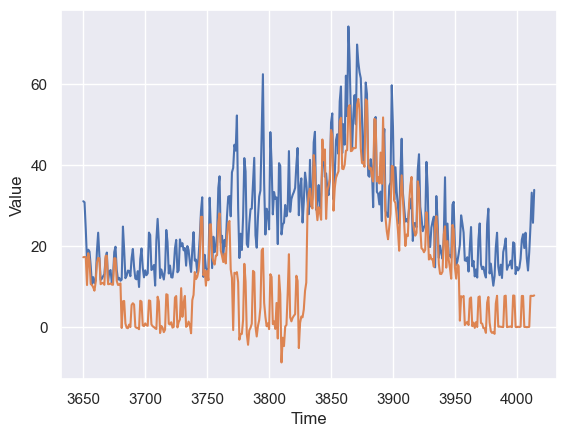

In [143]:
resid_test_pred = np.array(pred_resid[0:])
resid_test_pred.shape



plot_series(time_valid, x_valid)
plot_series(time_valid, resid_test_pred)

In [144]:
print('RMSE : ',np.sqrt(((x_valid - resid_test_pred)**2).mean()))
mae=mean_absolute_error(x_valid,  resid_test_pred)
print('MAE : ',mae)

RMSE :  15.169935816124983
MAE :  12.066525048850002
